In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Example 8.6

In [3]:
#=============
# Data Load
#=============

raw_data = pd.read_csv("./gas.txt", sep=' ',
                        names=list(range(11)),skipinitialspace=True)

raw_data_ary = np.array(raw_data).flatten()
raw_data_ary = raw_data_ary[~np.isnan(raw_data_ary)]

## 그림 8-2

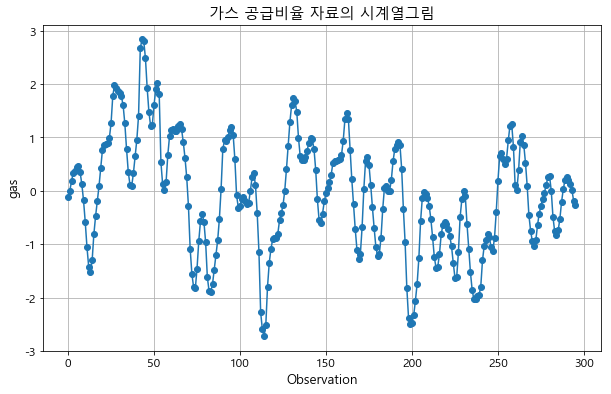

In [4]:
plt.figure(figsize=(10,6))
plt.plot(raw_data_ary, marker='o')
plt.xlabel('Observation', fontsize=13)
plt.ylabel('gas', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('가스 공급비율 자료의 시계열그림', fontsize=15)
plt.grid(True)
plt.show()

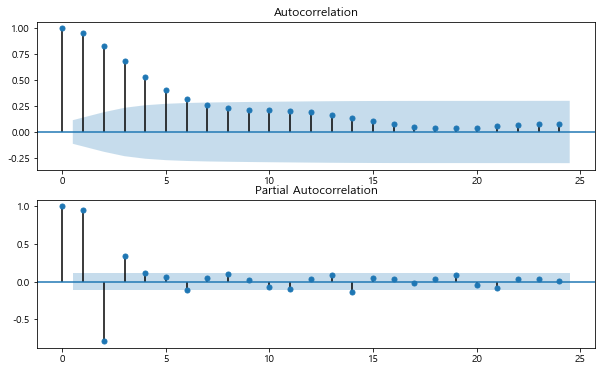

In [5]:
#==========================
# 시계열 자료의 ACF, PACF
# Parameters
# lags
# method - ywunbiased(Default) / ywmle(Yule-Walker) / ols
#==========================

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(211)
fig = plot_acf(raw_data_ary,lags=24,ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(raw_data_ary,lags=24,ax=ax2,method='ywmle')

## <표 8-1>
## - 가스 공급비율 자료의 백색잡음검정


In [6]:
#===============================================================================
#자기상관계수 / Ljung-Box Q통계량 / P-Value Table
# Parameters
# X :Time series data
# nlags : Number of lags to return autocorrelation
# qstat : return the Ljung-Box q Statistic for each autocorrelation coefficient
# alpha, fft
#===============================================================================

acf = sm.tsa.acf(raw_data_ary,nlags=24)
acf

C:\Users\DongMin\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([1.        , 0.95247492, 0.83409213, 0.68185978, 0.53123258,
       0.40750212, 0.31820083, 0.26019453, 0.22751262, 0.2130696 ,
       0.20833078, 0.20284733, 0.18928153, 0.16732276, 0.1375118 ,
       0.10479677, 0.07541142, 0.05203357, 0.03705126, 0.03398256,
       0.04236209, 0.05635455, 0.06938839, 0.076526  , 0.07611202])

In [7]:
#===================================
# Ljungbox, Box-Pierce 검정통계량
# Parameters
# Lags
# model_df : Degree of Freedom - statsmodels 최신버전으로 업데이트 필요
# return_df : Dataframe type
# boxpierce : Boxpierce test
#===================================

sm.stats.acorr_ljungbox(raw_data_ary, 
                        lags=[6,12,18,24], model_df=3, return_df=True)

,lb_stat,lb_pvalue
6,786.347816,3.954030e-170
12,874.066770,2.390306e-182
18,895.238435,3.686007e-181
24,902.519201,1.557327e-177


## <표 8-2>
## - 모평균이 포함된 AR(3)모형 적합 결과

In [8]:
#=================================
# Parameters
# endog : Raw Data
# exog : exogenous vairables
# (a, b) : AR / MA 차수
# method : css-mle / mle / css
#=================================

model1 = sm.tsa.ARMA(raw_data_ary,(3,0))
fit1 = model1.fit(trend='c', method='css')
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:                     ARMA(3, 0)   Log Likelihood                  72.834
Method:                           css   S.D. of innovations              0.189
Date:                Thu, 27 Feb 2020   AIC                           -135.668
Time:                        16:06:30   BIC                           -117.267
Sample:                             3   HQIC                          -128.298
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0689      0.197     -0.349      0.727      -0.456       0.318
ar.L1.y        1.9750      0.055     35.988      0.000       1.867       2.083
ar.L2.y       -1.3732      0.099    -13.807      0.000      -1.568      -1.178
ar.L3.y        0.3424      0.055      6.237      0.000       0.235       0.450
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3069           -0.0000j            1.3069           -0.0000
AR.2            1.3516           -0.6384j            1.4948           -0.0702
AR.3            1.3516           +0.6384j            1.4948            0.0702
-----------------------------------------------------------------------------
"""

## Result
### 1. 조건부 최소제곱법(css)으로 적합
### 2. constant = 모평균 / but 값 다름

## <표 8-3>
## - 모평균이 없는 AR(3)모형 적합 결과

In [11]:
model2 = sm.tsa.ARMA(raw_data_ary,(0,3))
fit2 = model2.fit()
fit2.summary()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

## Result
### 1. 최소제곱합을 kalman-filter로 적합
### 2. 상수항(모평균) 미포함

## 그림 8-3

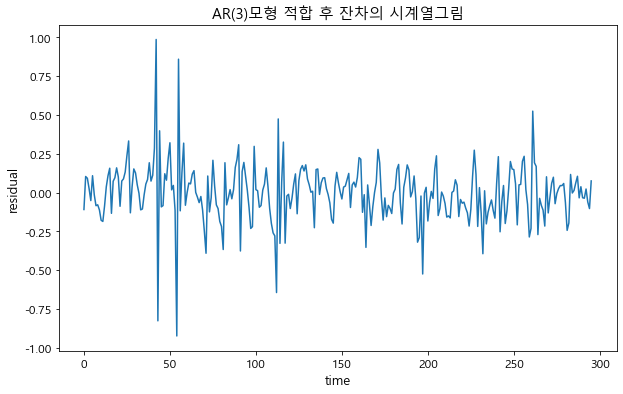

In [12]:
plt.figure(figsize=(10,6))
plt.plot(fit2.resid)
plt.xlabel('time', fontsize=13)
plt.ylabel('residual', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('AR(3)모형 적합 후 잔차의 시계열그림', fontsize=15)
plt.show()

## 그림 8-4
## - 잔차의 상관분석

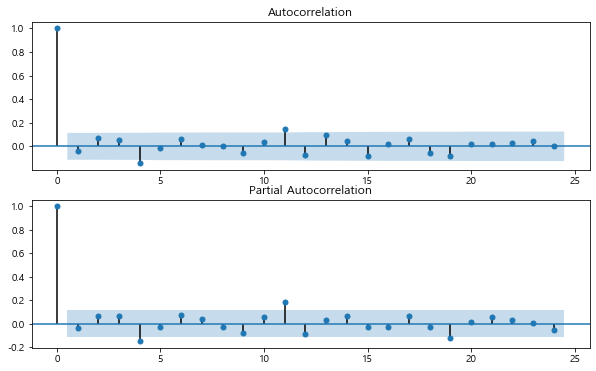

In [13]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(211)
fig = plot_acf(fit2.resid,lags=24, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(fit2.resid,lags=24, ax=ax2)

## 그림 8-5
## - 잔차의 정규성검정

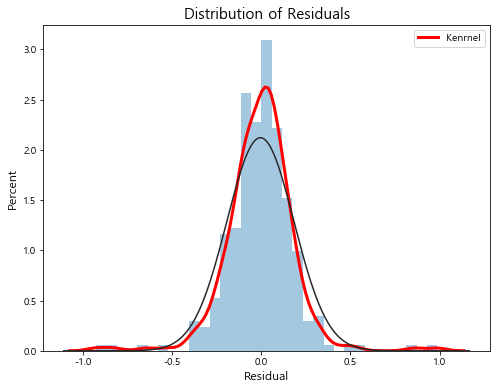

In [14]:
#===============================================
# Parameters
# x : Series
# kde : Plot a gaussian kernel density estimate
# fit : To normal dist
#================================================
import seaborn as sns
import scipy as sp

plt.figure(figsize=(8,6))
sns.distplot(fit2.resid,
             kde_kws={"color":"r", "lw":3, "label":"Kenrnel"},
             fit=sp.stats.norm)

plt.xlabel('Residual', fontsize=12)
plt.ylabel('Percent', fontsize=12)
plt.title('Distribution of Residuals', fontsize=15)
plt.show()

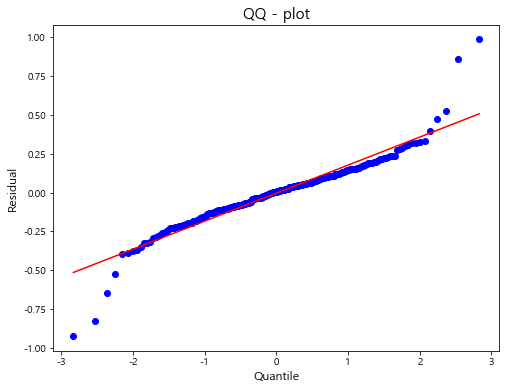

In [15]:
#==========================================================
# Parameters
# x : Data
# dist
# plot 
# fit : To least-squares regression line to sample data
#===========================================================
import scipy.stats as stats

plt.figure(figsize=(8,6))
stats.probplot(fit2.resid, dist="norm", plot=plt)

plt.xlabel('Quantile', fontsize=12)
plt.ylabel('Residual', fontsize=12)
plt.title("QQ - plot", fontsize=15)
plt.show()

## 표 8-4
## - AR(3)모형 적합 후의 포트맨토 검정 결과

In [16]:
#자기상관계수 값

resid_acf = sm.tsa.acf(fit2.resid, nlags=24)
resid_acf

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.        , -0.03629895,  0.07005774,  0.05740027, -0.14260172,
       -0.01040941,  0.05808179,  0.01451353,  0.00241182, -0.05383431,
        0.03720801,  0.14418394, -0.07584677,  0.09838515,  0.04157221,
       -0.08282295,  0.01781064,  0.06469577, -0.05288274, -0.07962642,
        0.02226741,  0.01568993,  0.02997079,  0.04433731,  0.00337006])

In [17]:
#=====================================
# Lag 별 카이제곱(Ljungbox Test)
#=====================================

In [18]:
sm.stats.acorr_ljungbox(fit2.resid, lags=[6], model_df=3, return_df=True)

,lb_stat,lb_pvalue
6,10.060302,0.01806


In [19]:
sm.stats.acorr_ljungbox(fit2.resid, lags=[12], model_df=9, return_df=True)

,lb_stat,lb_pvalue
12,19.665074,0.000199


In [20]:
sm.stats.acorr_ljungbox(fit2.resid, lags=[18], model_df=15, return_df=True)

,lb_stat,lb_pvalue
18,27.686557,0.000004


In [21]:
sm.stats.acorr_ljungbox(fit2.resid, lags=[24], model_df=21, return_df=True)

,lb_stat,lb_pvalue
24,30.871029,9.048932e-07


In [75]:
#Box-Pierce 검정통계량
sm.stats.acorr_ljungbox(fit2.resid, 
                        lags=[6,12,18,24], model_df=3, return_df=True)

,lb_stat,lb_pvalue
6,10.060302,0.018060
12,19.665074,0.020096
18,27.686557,0.023615
24,30.871029,0.075831


# Example 8.7

In [23]:
#=============
# Data Load
#=============

raw_data2 = pd.read_csv("./eg8_7.txt", sep=' ',
                        names=list(range(12)),skipinitialspace=True)

raw_data_ary2 = np.array(raw_data2).flatten()
raw_data_ary2 = raw_data_ary2[~np.isnan(raw_data_ary2)]

## 그림 8-6

### 모의실험 자료의 시계열그림과 상관도표

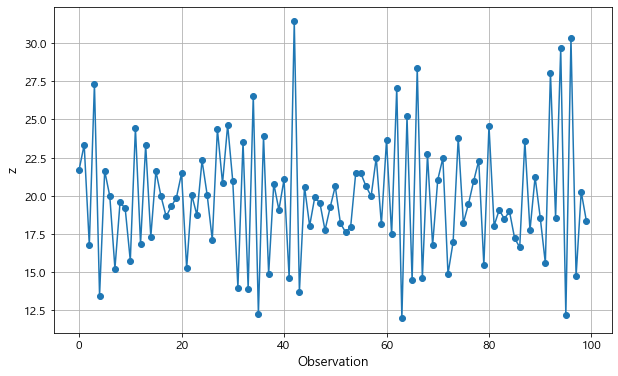

In [24]:
plt.figure(figsize=(10,6))
plt.plot(raw_data_ary2, marker='o')
plt.xlabel('Observation', fontsize=13)
plt.ylabel('z', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

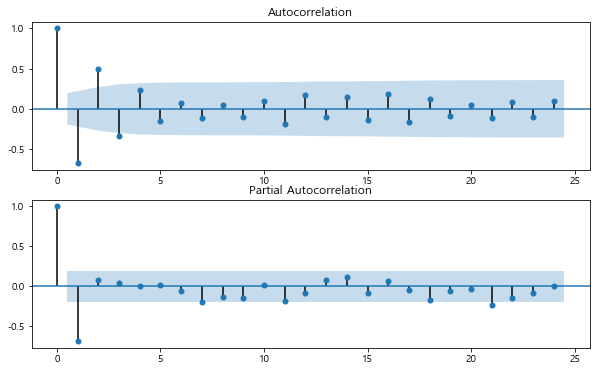

In [25]:
#==========================
#시계열 자료의 ACF, PACF
#==========================

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(211)
fig = plot_acf(raw_data_ary2,lags=24, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(raw_data_ary2,lags=24, ax=ax2)

## 표 8-5

In [26]:
#=========================================
#자기상관계수, Ljung-Box Q통계량, P-Value
#=========================================

acf = sm.tsa.acf(raw_data_ary2, nlags=24)
acf

array([ 1.        , -0.67582508,  0.49848274, -0.33983476,  0.23624358,
       -0.15073773,  0.0672584 , -0.11743226,  0.05064708, -0.09907075,
        0.1031555 , -0.18679234,  0.16977023, -0.10501166,  0.1419976 ,
       -0.14017016,  0.18169355, -0.1634646 ,  0.11865906, -0.08878918,
        0.04331077, -0.11336381,  0.08059835, -0.10340279,  0.09457607])

In [27]:
#AR(1)모형으로 적합
#카이제곱, 유의확률의 Ljungbox-Test

sm.stats.acorr_ljungbox(raw_data_ary2, 
                        lags=[6,12,18,24], model_df=1, return_df=True)

,lb_stat,lb_pvalue
6,93.925206,1.005053e-18
12,105.367731,1.535858e-17
18,120.453612,1.263851e-17
24,126.811121,2.438903e-16


## 표 8-6

In [28]:
#=============================================
#모평균(constant)이 있는 AR(1)모형 적합결과
#CSS : Contidional Sum of Square
#=============================================

model3 = sm.tsa.ARMA(raw_data_ary2,(1,0))
fit3 = model3.fit(trend='c', method='css-mle')
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 0)   Log Likelihood                -250.611
Method:                       css-mle   S.D. of innovations              2.957
Date:                Tue, 25 Feb 2020   AIC                            507.223
Time:                        13:56:45   BIC                            515.038
Sample:                             0   HQIC                           510.386
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8312      0.178    111.651      0.000      19.483      20.179
ar.L1.y       -0.6715      0.073     -9.226      0.000      -0.814      -0.529
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4891           +0.0000j            1.4891            0.5000
-----------------------------------------------------------------------------
"""

## 그림 8-7

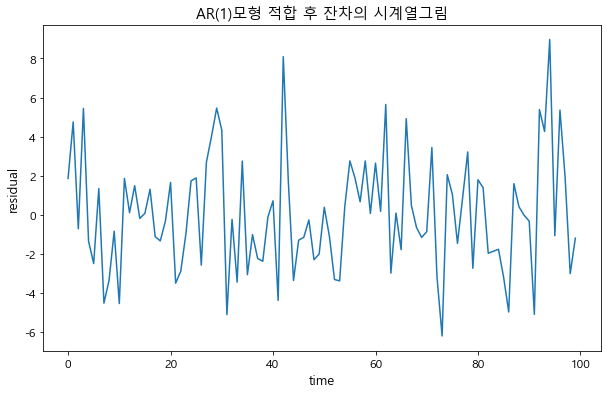

In [29]:
plt.figure(figsize=(10,6))
plt.plot(fit3.resid)
plt.xlabel('time', fontsize=13)
plt.ylabel('residual', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('AR(1)모형 적합 후 잔차의 시계열그림', fontsize=15)
plt.show()

## 그림 8-8

### 잔차의 상관분석

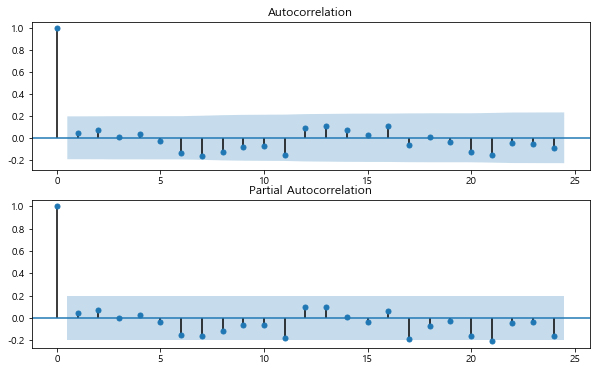

In [30]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(211)
fig = plot_acf(fit3.resid,lags=24, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(fit3.resid,lags=24, ax=ax2)

## 표 8-7

In [31]:
#===========================================
#잔차의 ACF와 포트맨토검정
#자기상관계수
#Ljung-Box Q통계량, P-Value - qstats 추가
#===========================================

resid_acf2 = sm.tsa.acf(fit3.resid, nlags=24)
resid_acf2

array([ 1.        ,  0.04598077,  0.07256283,  0.00279345,  0.03080202,
       -0.02855211, -0.14167284, -0.16299392, -0.12614009, -0.08016968,
       -0.07814622, -0.16162593,  0.09341629,  0.10698179,  0.07073638,
        0.02223729,  0.10811332, -0.06745465,  0.00288781, -0.03538747,
       -0.1323057 , -0.15285855, -0.04908811, -0.05873508, -0.09326305])

### 1. 위의 잔차 acf 검정과 동일한 파라미터 사용
### 2. but acf 계수값이 좀 다른 모습을 보임
### 3. 유의확률 , 카이제곱도 차이가 존재

# 포트맨토검정
### * Ljungbox-test에서 자유도는 AR차수와 MA차수의 합

In [32]:
sm.stats.acorr_ljungbox(fit3.resid, 
                        lags=[6,12,18,24], model_df=1, return_df=True)

,lb_stat,lb_pvalue
6,3.132951,0.679497
12,13.228709,0.278640
18,17.202869,0.440706
24,24.548724,0.373965


## 그림 8-9

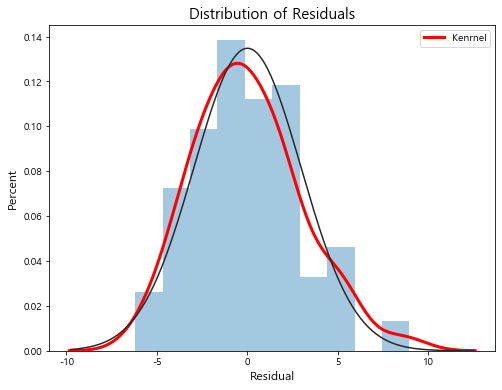

In [33]:
#===================
#잔차의 정규성 검정
#정규분포와 비교
#===================

plt.figure(figsize=(8,6))
sns.distplot(fit3.resid,
             kde_kws={"color":"r", "lw":3, "label":"Kenrnel"},
             fit=sp.stats.norm)
plt.xlabel('Residual', fontsize=12)
plt.ylabel('Percent', fontsize=12)
plt.title('Distribution of Residuals', fontsize=15)
plt.show()

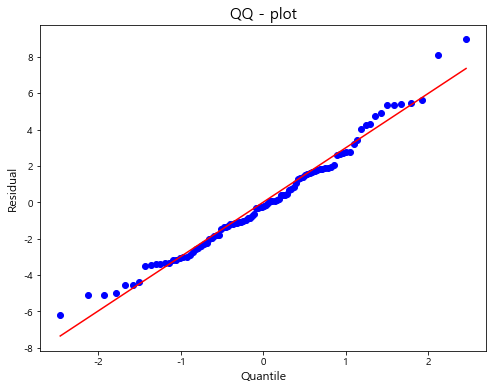

In [34]:
#============
#QQ Plot
#============
import scipy.stats as stats

plt.figure(figsize=(8,6))
stats.probplot(fit3.resid, dist="norm", plot=plt)
plt.xlabel('Quantile', fontsize=12)
plt.ylabel('Residual', fontsize=12)
plt.title("QQ - plot", fontsize=15)
plt.show()

## 과대적합

## 표 8-8

In [35]:
#=================================
#모평균이 있는 AR(2)모형 적합결과
#=================================

model3 = sm.tsa.ARMA(raw_data_ary2,(2,0))
fit3 = model3.fit(trend='c', method="css-mle")
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(2, 0)   Log Likelihood                -250.366
Method:                       css-mle   S.D. of innovations              2.950
Date:                Tue, 25 Feb 2020   AIC                            508.731
Time:                        14:01:23   BIC                            519.152
Sample:                             0   HQIC                           512.949
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8331      0.191    104.066      0.000      19.460      20.207
ar.L1.y       -0.6231      0.100     -6.224      0.000      -0.819      -0.427
ar.L2.y        0.0704      0.100      0.702      0.483      -0.126       0.267
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3874           +0.0000j            1.3874            0.5000
AR.2           10.2401           +0.0000j           10.2401            0.0000
-----------------------------------------------------------------------------
"""

## 표 8-9

In [36]:
#=====================================
#모평균이 있는 ARMA(1,1)모형 적합결과
#=====================================

model4 = sm.tsa.ARMA(raw_data_ary2,(1,1))
fit4 = model4.fit(trend='c', method="css-mle")
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 1)   Log Likelihood                -250.393
Method:                       css-mle   S.D. of innovations              2.950
Date:                Tue, 25 Feb 2020   AIC                            508.787
Time:                        14:01:25   BIC                            519.207
Sample:                             0   HQIC                           513.004
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8329      0.188    105.527      0.000      19.465      20.201
ar.L1.y       -0.7214      0.097     -7.400      0.000      -0.913      -0.530
ma.L1.y        0.0927      0.139      0.665      0.506      -0.181       0.366
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3862           +0.0000j            1.3862            0.5000
MA.1          -10.7867           +0.0000j           10.7867            0.5000
-----------------------------------------------------------------------------
"""

### 1. MA 모형에서 반대 계수, t값이 도출
### 2. p값, coef의 절댓값은 동일
### => MA항이 좌변으로 이항된다면 동일한 값?

# Example 8.8

In [37]:
#=============
# Data Load
#=============

raw_data3 = pd.read_csv("./elecstock.txt", sep=' ',
                        names=list(range(20)),skipinitialspace=True)

raw_data_ary3 = np.array(raw_data3).flatten()
raw_data_ary3 = raw_data_ary3[~np.isnan(raw_data_ary3)]

## 그림 8-10

### 주가지수의 시계열그림과 상관도표

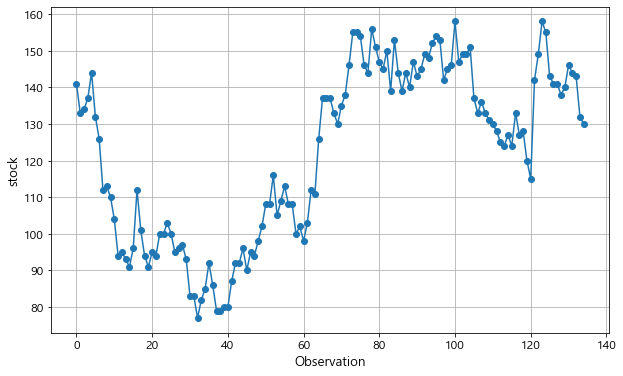

In [38]:
plt.figure(figsize=(10,6))
plt.plot(raw_data_ary3, marker='o')
plt.xlabel('Observation', fontsize=13)
plt.ylabel('stock', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

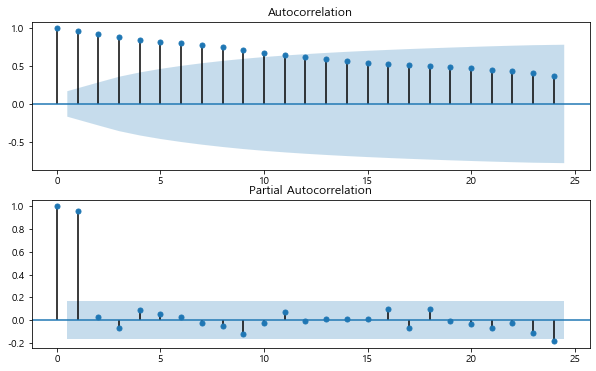

In [39]:
#==========================
#시계열 자료의 ACF, PACF
#==========================

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(211)
fig = plot_acf(raw_data_ary3, lags=24, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(raw_data_ary3, lags=24, ax=ax2, method='ywmle')

## 표 8-10

## -ADF 단위근검정 결과

In [40]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [41]:
#Case1 (Zero mean) 

sm.tsa.adfuller(raw_data_ary3, maxlag=0, regression='nc', autolag=None)

(-0.4604237178535466,
 0.5123160991486803,
 0,
 134,
 {'1%': -2.5826270683893964,
  '5%': -1.9431789035719156,
  '10%': -1.6149785161738643})

In [42]:
sm.tsa.adfuller(raw_data_ary3, maxlag=1, regression='nc', autolag=None)

(-0.33598483231849596,
 0.5620653337004666,
 1,
 133,
 {'1%': -2.582755568997682,
  '5%': -1.9431965085986491,
  '10%': -1.6149656551095641})

In [43]:
sm.tsa.adfuller(raw_data_ary3, maxlag=2, regression='nc', autolag=None)

(-0.3580354410990081,
 0.5533948666018893,
 2,
 132,
 {'1%': -2.5828860399449036,
  '5%': -1.943214397504661,
  '10%': -1.6149526129754848})

In [44]:
#Case2 (Single mean) - constant only

sm.tsa.adfuller(raw_data_ary3, maxlag=0, regression='c', autolag=None)

(-1.6768775961040276,
 0.4430634757847845,
 0,
 134,
 {'1%': -3.480118600110386,
  '5%': -2.8833618426136196,
  '10%': -2.578407034974382})

In [45]:
sm.tsa.adfuller(raw_data_ary3, maxlag=1, regression='c', autolag=None)

(-1.5572201826088066,
 0.505039670526336,
 1,
 133,
 {'1%': -3.480500383888377,
  '5%': -2.8835279559405045,
  '10%': -2.578495716547007})

In [46]:
sm.tsa.adfuller(raw_data_ary3, maxlag=2, regression='c', autolag=None)

(-1.6290357980077907,
 0.4679954554016689,
 2,
 132,
 {'1%': -3.4808880719210005,
  '5%': -2.8836966192225284,
  '10%': -2.5785857598714417})

In [47]:
#Case3 (Trend) - constant + 1st trend

sm.tsa.adfuller(raw_data_ary3, maxlag=0, regression='ct', autolag=None)

(-2.7980242419676196,
 0.19767106616491043,
 0,
 134,
 {'1%': -4.027969407257541,
  '5%': -3.443776267094024,
  '10%': -3.1465734136180314})

In [48]:
sm.tsa.adfuller(raw_data_ary3, maxlag=1, regression='ct', autolag=None)

(-2.5578445493080233,
 0.2996702991227377,
 1,
 133,
 {'1%': -4.028502544757224,
  '5%': -3.4440306386960673,
  '10%': -3.146722003543258})

In [49]:
sm.tsa.adfuller(raw_data_ary3, maxlag=2, regression='ct', autolag=None)

(-2.703229488564242,
 0.23474408311297912,
 2,
 132,
 {'1%': -4.02904396268122,
  '5%': -3.444288929202493,
  '10%': -3.1468728733617164})

## 표 8-11

In [50]:
#===========================
# 1차 차분된 주가지수 자료
#===========================

dif = sm.tsa.statespace.tools.diff(raw_data_ary3, k_diff=1)

In [51]:
sm.tsa.acf(dif, nlags=24)

array([ 1.00000000e+00, -3.12761911e-02,  3.77466737e-02, -1.31655390e-01,
       -8.42201704e-02, -1.65609615e-03,  4.60862189e-02,  8.57161975e-02,
        1.16254560e-01,  3.99998568e-03, -8.81088435e-02, -8.51344349e-04,
       -4.58572200e-02,  5.46348552e-03,  3.67135722e-02, -1.13585290e-01,
        2.22895534e-02, -9.00691437e-02,  3.62198308e-02,  2.39453545e-02,
        6.01353334e-02,  1.48922164e-02,  8.75830962e-02,  1.15000417e-01,
       -7.85831309e-02])

In [52]:
sm.stats.acorr_ljungbox(dif, 
                        lags=[6,12,18,24], model_df=1, return_df=True)

,lb_stat,lb_pvalue
6,4.039155,0.543792
12,8.505716,0.667413
18,12.237132,0.785570
24,17.384384,0.789973


## 그림 8-11

### 1차 차분된 주가지수의 시계열그림과 상관도표

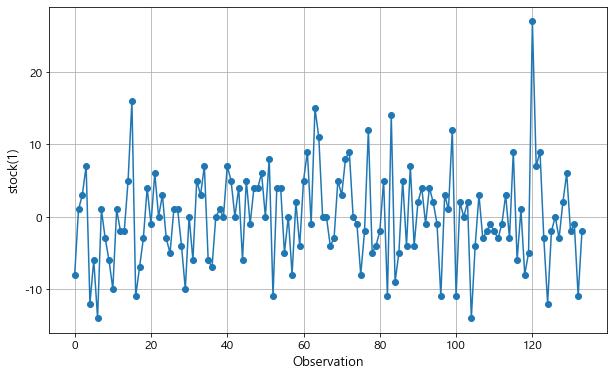

In [53]:
plt.figure(figsize=(10,6))
plt.plot(dif, marker='o')
plt.xlabel('Observation', fontsize=13)
plt.ylabel('stock(1)', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

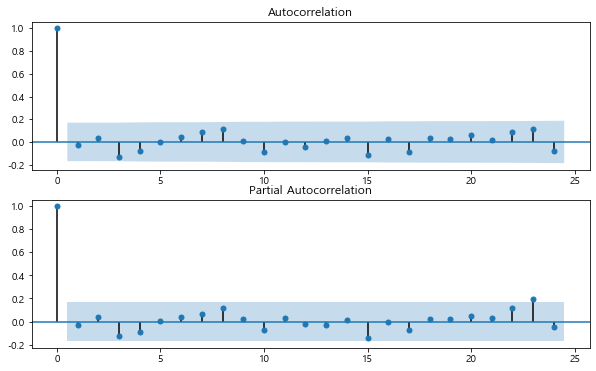

In [54]:
#===================================
#1차 차분된 주가지수의 ACF, PACF
#===================================

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(211)
fig = plot_acf(dif,lags=24, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(dif,lags=24, ax=ax2, method='ywmle')

# Example 8.9

In [55]:
#=============
# Data Load
#=============

raw_data4 = pd.read_csv("./female.txt", sep=' ',
                        names=list(range(21)),skipinitialspace=True)

raw_data_ary4 = np.array(raw_data4).flatten()
raw_data_ary4 = raw_data_ary4[~np.isnan(raw_data_ary4)]

## 그림 8-12

### 여성 근로자 수의 시계열그림과 상관도표

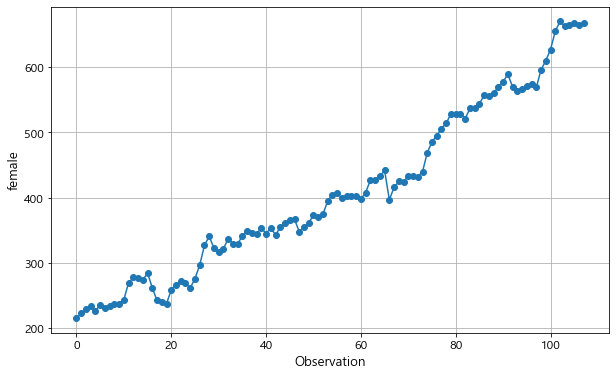

In [56]:
plt.figure(figsize=(10,6))
plt.plot(raw_data_ary4, marker='o')
plt.xlabel('Observation', fontsize=13)
plt.ylabel('female', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

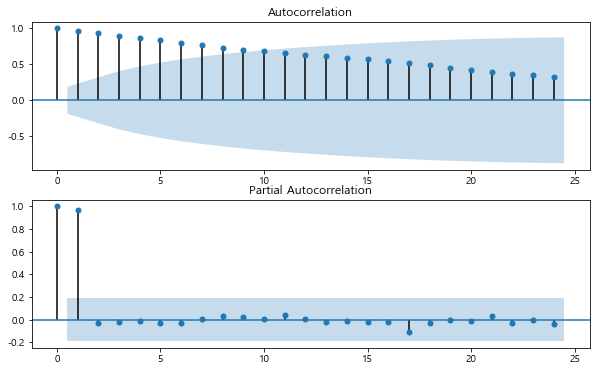

In [57]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(211)
fig = plot_acf(raw_data_ary4,lags=24, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(raw_data_ary4,lags=24, ax=ax2, method='ywmle')

## 표 8-12
## ADF 단위근검정 결과

In [58]:
#Case1 (Zero mean) 
#첫번째 : tau in lag 0
#두번째 : Pr<tau
sm.tsa.adfuller(raw_data_ary4, maxlag=0, regression='nc', autolag=None)

(3.8236622822150808,
 0.9999994755246552,
 0,
 107,
 {'1%': -2.5869521233295485,
  '5%': -1.9437787052372857,
  '10%': -1.6145541037008495})

In [59]:
sm.tsa.adfuller(raw_data_ary4, maxlag=1, regression='nc', autolag=None)

(3.1651410956842474,
 0.9999241362143255,
 1,
 106,
 {'1%': -2.5871552545389815,
  '5%': -1.9438072306333416,
  '10%': -1.6145345885529665})

In [60]:
sm.tsa.adfuller(raw_data_ary4, maxlag=2, regression='nc', autolag=None)

(3.2680610795485125,
 0.9999599021065566,
 2,
 105,
 {'1%': -2.58736231292517,
  '5%': -1.9438363390562574,
  '10%': -1.6145147336140804})

In [61]:
#Case2 (Single mean) 
#첫번째 : tau in lag 0
#두번째 : Pr<tau
sm.tsa.adfuller(raw_data_ary4, maxlag=0, regression='c', autolag=None)

(0.545272886166054,
 0.9861860749708257,
 0,
 107,
 {'1%': -3.492995948509562,
  '5%': -2.888954648057252,
  '10%': -2.58139291903223})

In [62]:
sm.tsa.adfuller(raw_data_ary4, maxlag=1, regression='c', autolag=None)

(0.44295467578126557,
 0.9830321422720101,
 1,
 106,
 {'1%': -3.4936021509366793,
  '5%': -2.8892174239808703,
  '10%': -2.58153320754717})

In [63]:
sm.tsa.adfuller(raw_data_ary4, maxlag=2, regression='c', autolag=None)

(0.601880638378821,
 0.9876618920525401,
 2,
 105,
 {'1%': -3.4942202045135513,
  '5%': -2.889485291005291,
  '10%': -2.5816762131519275})

In [64]:
#Case3 (Trend) 
#첫번째 : tau in lag 0
#두번째 : Pr<tau
sm.tsa.adfuller(raw_data_ary4, maxlag=0, regression='ct', autolag=None)

(-2.1323354598789064,
 0.5279485928439681,
 0,
 107,
 {'1%': -4.045970933273362,
  '5%': -3.452348053635668,
  '10%': -3.1515755794286404})

In [65]:
sm.tsa.adfuller(raw_data_ary4, maxlag=1, regression='ct', autolag=None)

(-2.4925940731484415,
 0.33167483043969065,
 1,
 106,
 {'1%': -4.0468193247781725,
  '5%': -3.452751165593073,
  '10%': -3.151810567112449})

In [66]:
sm.tsa.adfuller(raw_data_ary4, maxlag=2, regression='ct', autolag=None)

(-2.3453064884183212,
 0.40906996827001374,
 2,
 105,
 {'1%': -4.047684391534392,
  '5%': -3.4531621209372636,
  '10%': -3.1520501036605117})

## 그림 8-13

### 1차 차분한 여성 근로자 수의 시계열그림과 상관도표

In [67]:
#==================================
# 1차 차분된 여성 근로자 수 자료
#==================================

fem_dif = sm.tsa.statespace.tools.diff(raw_data_ary4, k_diff=1)

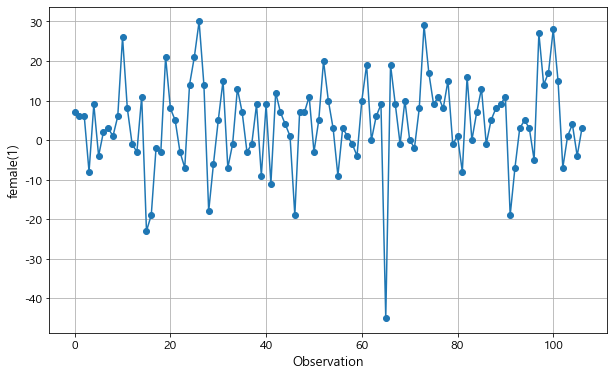

In [68]:
plt.figure(figsize=(10,6))
plt.plot(fem_dif, marker='o')
plt.xlabel('Observation', fontsize=13)
plt.ylabel('female(1)', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

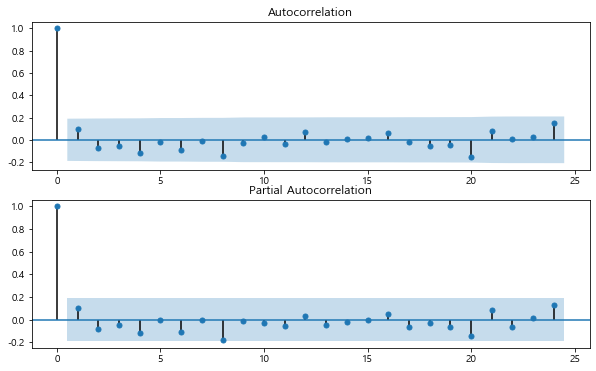

In [69]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(211)
fig = plot_acf(fem_dif, lags=24, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(fem_dif, lags=24, ax=ax2, method='ywmle')